In [1]:
%matplotlib inline

In [53]:
import cv2
from PIL import Image, ImageDraw
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [54]:
import sys
sys.path.append("..")
from src.generator.overlays import *
from generate_samples import get_generator_config
import math

In [4]:
matplotlib.rcParams['figure.figsize'] = (10, 15)

In [46]:
GREY = (100, 100, 100)
BLUE = (0, 135, 255)
YELLOW = (255, 241, 192, 100)

In [11]:
config = get_generator_config("../assets/icons")

In [47]:
image = Image.new("RGBA", config.background_image.size)

In [42]:
def test_create_light_beam(canvas, position, angle, spread, colour):
    width, height = canvas.size
    beam_length = width+height 
    x, y = position
    x1, y1 = int(x + beam_length*math.cos(angle+spread)), int(y + beam_length*math.sin(angle+spread))
    x2, y2 = int(x + beam_length*math.cos(angle-spread)), int(y + beam_length*math.sin(angle-spread))
    
    
    color_layer = Image.new("RGBA", canvas.size, colour)
    
    alpha_mask = Image.new('L', canvas.size, 0)
    alpha_mask_draw = ImageDraw.Draw(alpha_mask)
    alpha_mask_draw.polygon([(x, y), (x1, y1), (x2, y2)], fill=colour[3])
    
    canvas = Image.composite(color_layer, canvas, alpha_mask)
    return canvas

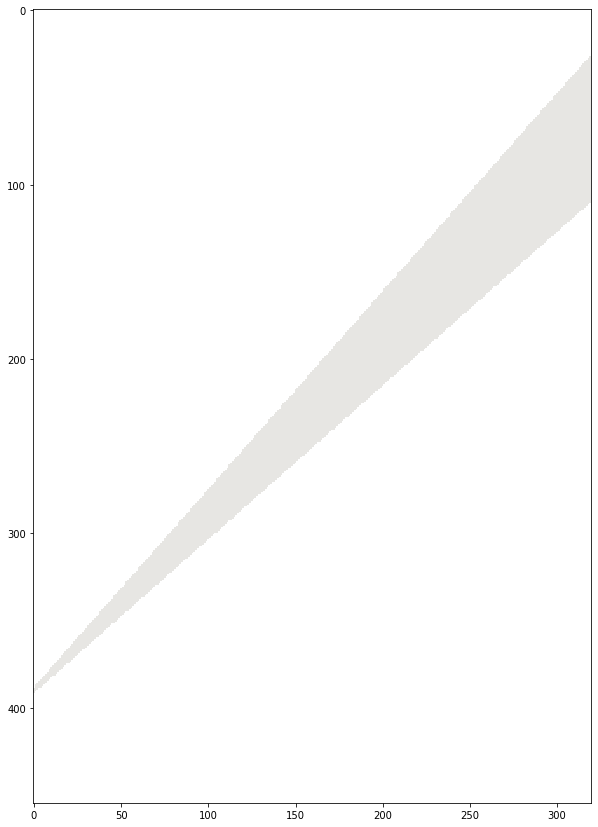

In [48]:
image = test_create_light_beam(image, (-10, 400), -math.pi/4, math.pi/50, YELLOW)
plt.imshow(image)

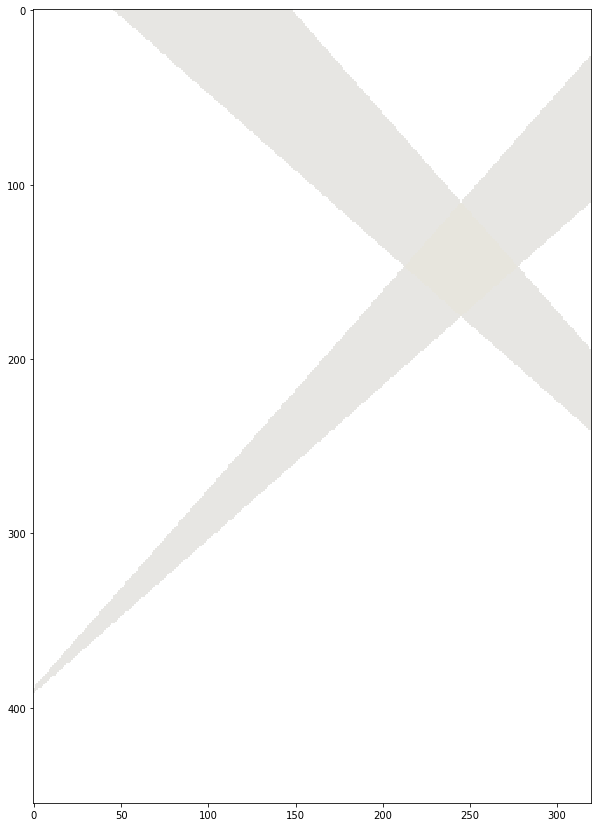

In [49]:
image = test_create_light_beam(image, (500, 400), -3*math.pi/4, math.pi/50, YELLOW)
plt.imshow(image)

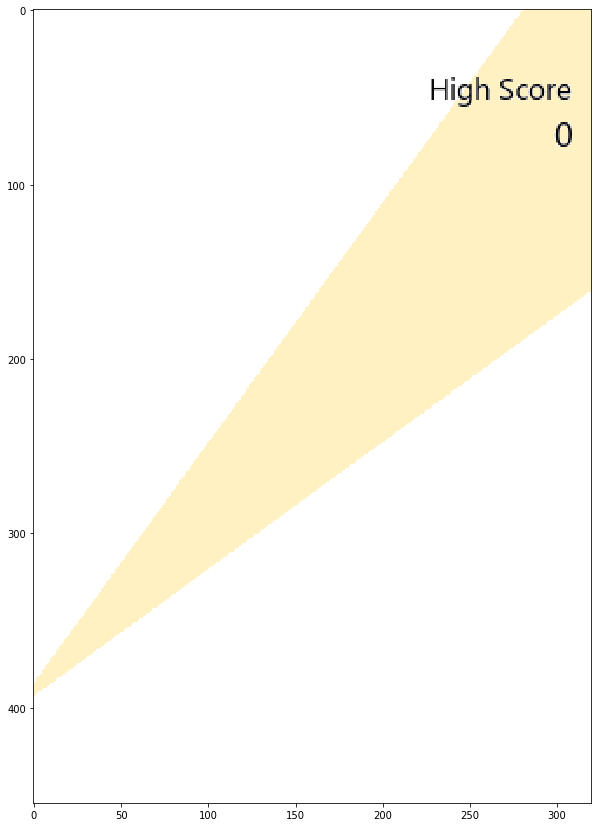

In [14]:
create_ui(image, config.background_image)
plt.imshow(image)

In [194]:
def create_firework(canvas, pos, explosion_size, colour, streak_size=3, total_lines=12, collapse_chance=0.7):
    draw = ImageDraw.Draw(canvas, "RGBA")
    
    explosion_collapsed = random.random() < collapse_chance

    x, y = pos
    delta = 2*math.pi/total_lines
    angle = 0
    
    if not explosion_collapsed:
        fire_radius = random.randint(0, int(explosion_size/2))
        draw.ellipse([(x-fire_radius, y-fire_radius), (x+fire_radius, y+fire_radius)], fill=colour)
        return

    fire_radius = random.randint(0, int(explosion_size/3))
    start_radius = explosion_size/2-fire_radius
    streak_length = explosion_size-fire_radius
    end_radius = start_radius+streak_length
    if fire_radius > explosion_size/10:
        draw.ellipse([(x-fire_radius, y-fire_radius), (x+fire_radius, y+fire_radius)], fill=colour)

    for _ in range(total_lines):
        x1, y1 = int(x + start_radius*math.cos(angle)), int(y + start_radius*math.sin(angle))
        x2, y2 = int(x + end_radius*math.cos(angle)), int(y + end_radius*math.sin(angle))
        draw.line([(x1,y1), (x2,y2)], fill=colour, width=streak_size)
        angle += delta

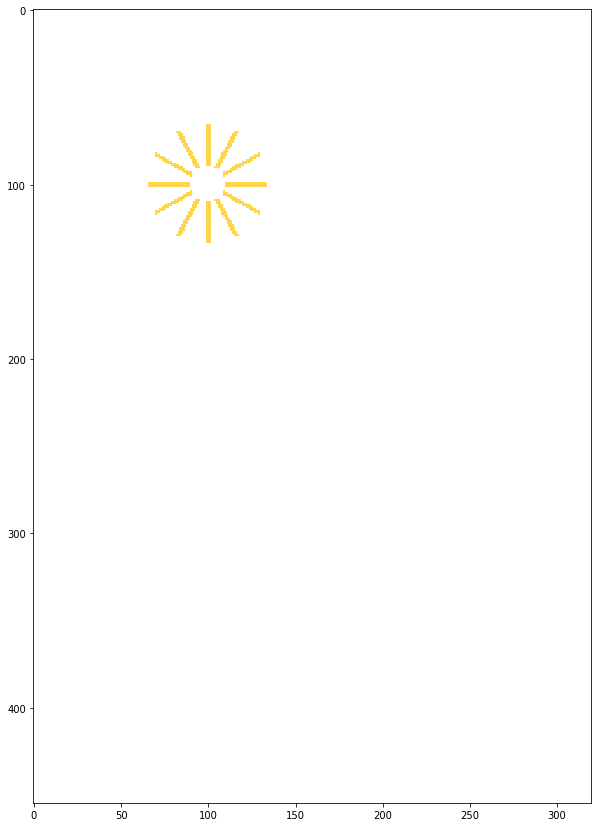

In [215]:
image = Image.new("RGBA", config.background_image.size)
pos = (100, 100)
explosion_size = 25

GREEN = (155, 225, 146)
PINK = (255, 149, 234)
YELLOW = (252, 214, 81)

create_firework(image, pos, explosion_size, YELLOW)
plt.imshow(image)